In [404]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [405]:
df= pd.read_csv('Airbnb_India_Top_500.csv')

In [406]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   address              500 non-null    object 
 1   isHostedBySuperhost  500 non-null    bool   
 2   location/lat         500 non-null    float64
 3   location/lng         500 non-null    float64
 4   name                 500 non-null    object 
 5   numberOfGuests       500 non-null    int64  
 6   pricing/rate/amount  500 non-null    int64  
 7   roomType             500 non-null    object 
 8   stars                196 non-null    float64
dtypes: bool(1), float64(3), int64(2), object(3)
memory usage: 31.9+ KB


In [407]:
df.describe()

,location/lat,location/lng,numberOfGuests,pricing/rate/amount,stars
count,500.000000,500.000000,500.000000,500.000000,196.000000
mean,19.671298,74.948030,11.560000,938.062000,4.650204
std,6.499412,7.098764,4.543532,2117.821537,0.392452
min,9.418870,-73.750710,1.000000,129.000000,2.330000
25%,15.526502,73.747743,8.000000,433.000000,4.547500
50%,17.920890,73.804140,12.000000,508.500000,4.750000
75%,26.791295,77.019307,16.000000,724.250000,4.900000
max,34.090910,92.991610,16.000000,36079.000000,5.000000


In [408]:
df.isnull().sum()

address                  0
isHostedBySuperhost      0
location/lat             0
location/lng             0
name                     0
numberOfGuests           0
pricing/rate/amount      0
roomType                 0
stars                  304
dtype: int64

In [409]:
df.duplicated().sum()

np.int64(0)

In [410]:
df.dtypes

address                 object
isHostedBySuperhost       bool
location/lat           float64
location/lng           float64
name                    object
numberOfGuests           int64
pricing/rate/amount      int64
roomType                object
stars                  float64
dtype: object

In [411]:
df['roomType'].nunique()

40

roomType
Entire villa                         220
Farm stay                             58
Entire home                           49
Entire bungalow                       29
Room in hotel                         19
Private room in resort                13
Room in boutique hotel                12
Private room in villa                 11
Private room in bed and breakfast      9
Entire condo                           8
Entire cottage                         7
Entire rental unit                     7
Houseboat                              6
Entire chalet                          5
Entire serviced apartment              4
Room in heritage hotel                 4
Private room in bungalow               3
Room in serviced apartment             3
Entire place                           3
Boat                                   3
Entire vacation home                   2
Private room in home                   2
Private room in castle                 2
Castle                                 2
Room in

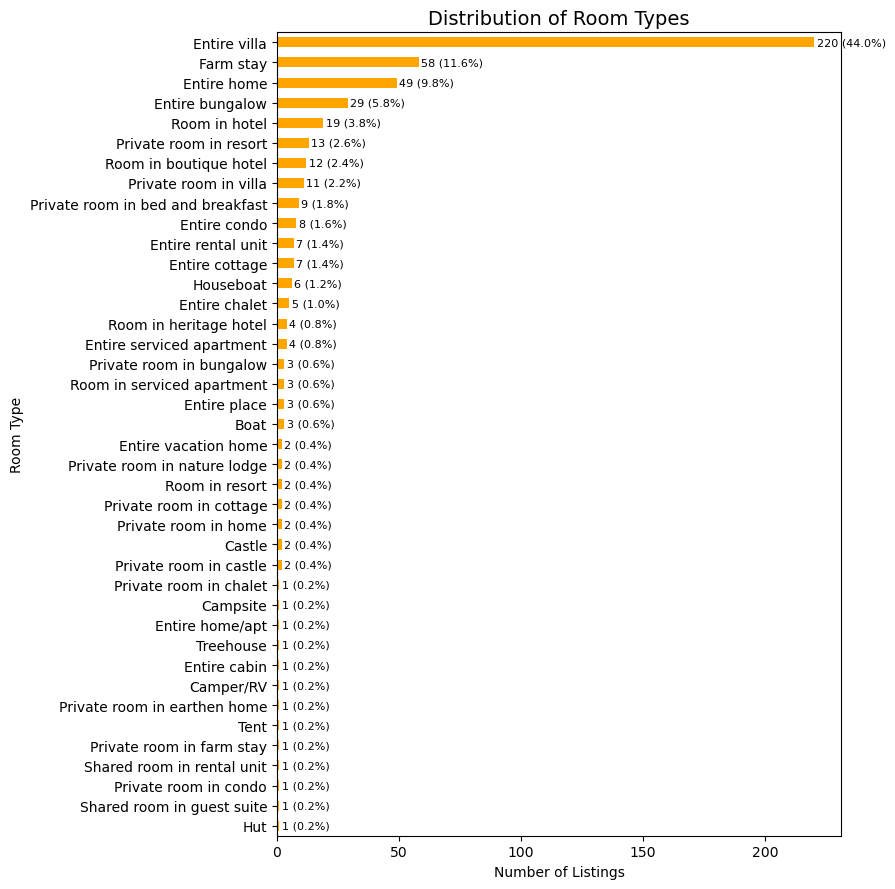

In [412]:
# to check the most/least common Room types
room = df['roomType'].value_counts().sort_values(ascending=True)
fig,ax=plt.subplots(figsize=(9,9))

room.plot(kind='barh', ax=ax, color='orange')
total = room.sum()
for bar in ax.patches:
    width = bar.get_width()
    pct = f'{(width / total * 100):.1f}%'
    ax.text(
        width + 1, 
        bar.get_y() + bar.get_height()/2, 
        f'{width:,.0f} ({pct})', 
        va='center', fontsize=8)
ax.set_title('Distribution of Room Types', fontsize=14)
ax.set_xlabel('Number of Listings')
ax.set_ylabel('Room Type')
plt.tight_layout()
df['roomType'].value_counts()

#### Insight
The Airbnb India dataset shows a strong preference for full private accommodations. “Entire villa” dominates with 220 listings (44% of total), followed by farm stays, entire homes, and bungalows. Shared or communal living arrangements are extremely uncommon, representing less than 2% of listings. While the majority of listings cater to comfort and privacy, the presence of unique stay types like boats, castles, and treehouses adds a distinctive charm to Airbnb’s offerings in India.


## Price Distribution

In [413]:
describe_price=df['pricing/rate/amount'].describe()
print(describe_price)

median_price=df['pricing/rate/amount'].median()
print(f'median of the price: {median_price}')

mode_price=df['pricing/rate/amount'].mode()
print(f'modeof the price:{mode_price}')

count      500.000000
mean       938.062000
std       2117.821537
min        129.000000
25%        433.000000
50%        508.500000
75%        724.250000
max      36079.000000
Name: pricing/rate/amount, dtype: float64
median of the price: 508.5
modeof the price:0    481
Name: pricing/rate/amount, dtype: int64


**mean is higher than median, pricing is right skewed (a few expensive listings)**

**Standard Deviation 2117.82 This is very high relative to the mean — suggests extreme variation**

**Max 36,079 Extremely high definitely an outlier**

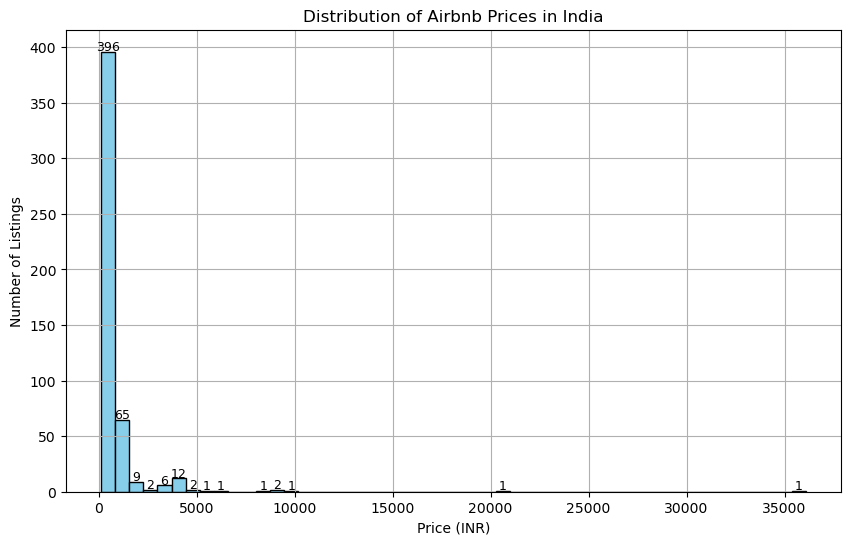

In [414]:
fig, ax=plt.subplots(figsize=(10,6))
ax.hist(df['pricing/rate/amount'], bins=50, color='skyblue', edgecolor='black')

for patch in ax.patches:
    height= patch.get_height()
    if height==0:
        continue
    x = patch.get_x()+patch.get_width()/2
    y = height
    ax.text(x,y+1,f'{int(height)}', ha='center', fontsize=9)

ax.set_title('Distribution of Airbnb Prices in India')
ax.set_xlabel('Price (INR)')
ax.set_ylabel('Number of Listings')
plt.grid(True)
plt.show()


### Insight
All Prices (Unfiltered)-
The price distribution is highly right-skewed.

Most listings are clustered under ₹5000, and there are a few high outliers (₹20k–₹36k).

Some luxury listings pull the average up, but these are rare.

Most Airbnb listings in India are affordable, but a few outliers distort the distribution.

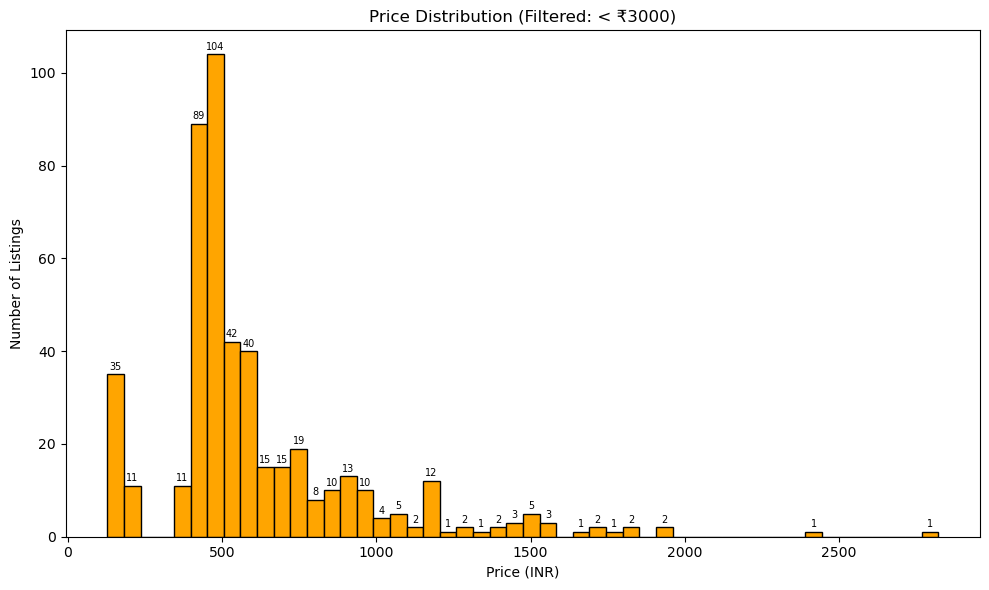

In [415]:
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histogram
ax.hist(df[df['pricing/rate/amount'] < 3000]['pricing/rate/amount'],bins=50, color='orange', edgecolor='black')

# Add labels using ax.patches
for patch in ax.patches:
    height = patch.get_height()  # height of the bar
    if height == 0:
        continue  # Skip empty bars
    x = patch.get_x() + patch.get_width() / 2  # center of bar
    y = height
    ax.text(x, 
            y + 1, 
            f'{int(height)}', 
            ha='center', fontsize=7)

ax.set_title('Price Distribution (Filtered: < ₹3000)')
ax.set_xlabel('Price (INR)')
ax.set_ylabel('Number of Listings')
plt.tight_layout()
plt.show()


### Insight
Prices under ₹3000- 
This is a zoomed-in view of typical listings.

Mode appears between ₹400–₹600.

Sharp peak = Most listings priced around ₹500.

Then it gradually decreases, showing fewer listings as price increases.

The sweet spot for pricing (i.e., most common pricing) is ₹400–₹700.
Perfect for understanding affordable stays.

<Axes: xlabel='pricing/rate/amount'>

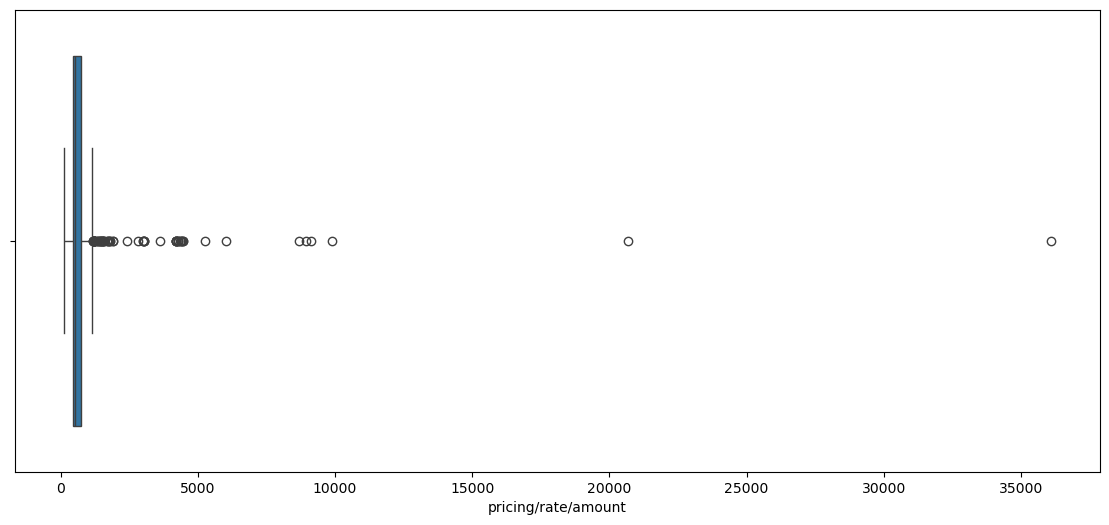

In [416]:
plt.figure(figsize=(14, 6))
sns.boxplot(x=df['pricing/rate/amount'])


### Location

In [417]:
df['address_parts'] = df['address'].str.split(',')
df['num_parts'] = df['address_parts'].apply(len)

df['num_parts'].value_counts()


num_parts
3    471
2     22
4      6
1      1
Name: count, dtype: int64

In [418]:
def extract_city_state(address):
    parts = [p.strip() for p in str(address).split(',') if p.strip()]
    
    if len(parts) >= 2:
        # If last part is "India", skip it
        if parts[-1].lower() == 'india':
            state = parts[-2]
            city = parts[-3] if len(parts) >= 3 else 'Unknown'
        else:
            state = parts[-1]
            city = parts[-2] if len(parts) >= 2 else 'Unknown'
    elif len(parts) == 1:
        city = parts[0]
        state = 'Unknown'
    else:
        city = 'Unknown'
        state = 'Unknown'
    
    return pd.Series([city, state])

# Apply to the DataFrame
df[['city_raw', 'state_raw']] = df['address'].apply(extract_city_state)


In [419]:
state_corrections = {
    'Mh': 'Maharashtra',
    'MH': 'Maharashtra',
    'Tn': 'Tamil Nadu',
    'TN': 'Tamil Nadu',
    'Ka': 'Karnataka',
    'KA': 'Karnataka',
    'कर्नाटक':'Karnataka',
    'महाराष्ट्र': 'Maharashtra',
    'Kodagu':'Karnataka',
    'Ga': 'Goa',
    'North Goa': 'Goa',
    'goa': 'Goa',
    'GA': 'Goa',
    'Calangute': 'Goa',
    'HP': 'Himachal Pradesh',
    'Hp': 'Himachal Pradesh',
    'Uttrakhand': 'Uttarakhand',
    'Hr': 'Haryana',
    'HR': 'Haryana',
    'Dodamarg Maharashtra': 'Maharashtra',
    'Bardez North Goa': 'Goa',
    'Bardez': 'Goa',
    'Varca': 'Goa',
    'Nasirabad': 'Rajasthan',
    'Mahagaon': 'Maharashtra',
    'Aru': 'Jammu And Kashmir',
    'Chuchot Yakma': 'Ladakh',
    'Alappuzha': 'Kerala',
    'Karle':'Maharashtra'
}

df['state_cleaned'] = df['state_raw'].replace(state_corrections)


In [420]:
df['state_cleaned'].value_counts()

state_cleaned
Goa                            170
Maharashtra                    102
Rajasthan                       39
Uttarakhand                     34
Kerala                          26
Himachal Pradesh                25
Tamil Nadu                      23
Delhi                           23
Karnataka                       16
Haryana                         16
Uttar Pradesh                    4
Andhra Pradesh                   3
Gujarat                          3
Punjab                           3
West Bengal                      2
Madhya Pradesh                   2
Puducherry                       2
Jammu And Kashmir                1
Unknown                          1
Bihar                            1
Ladakh                           1
Andaman and Nicobar Islands      1
Jammu and Kashmir                1
Telangana                        1
Name: count, dtype: int64

In [421]:
df['state_cleaned'].nunique()

24

### Insight
The dataset contains listings from 24 different states. The top 3 states with the highest number of listings are Goa,Maharashtra, and Rajasthan — indicating that these are top Airbnb destinations in India.

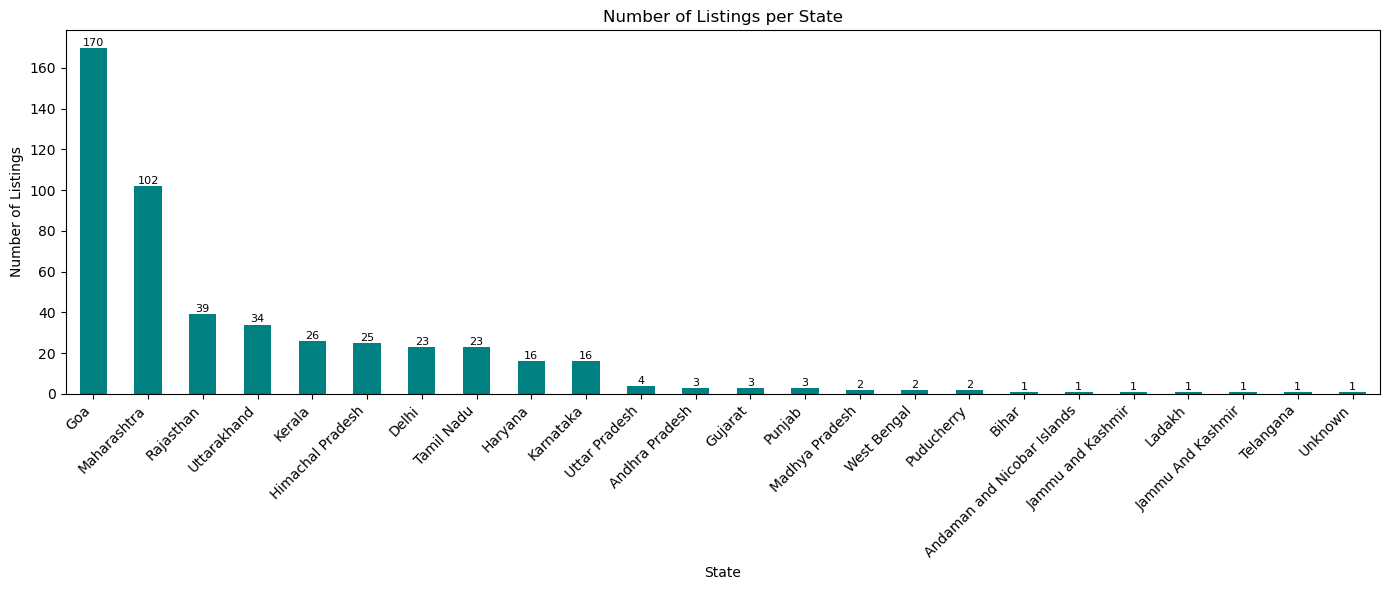

In [422]:
#Number of listings per state
state_grouped=df.groupby('state_cleaned').agg(listing_count=('state_cleaned', 'count')
                                      ).sort_values(by='listing_count', ascending=False)
fig,ax = plt.subplots(figsize=(14,6))
state_grouped['listing_count'].plot(kind='bar', ax=ax, color='teal')
for bar in ax.patches:
    height=bar.get_height()
    ax.text(
        bar.get_x()+bar.get_width()/2,
        height+1,
        f'{height:,.0f}',
        ha='center', fontsize=8
    )
ax.set_title('Number of Listings per State')
ax.set_xlabel('State')
ax.set_ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

#### Insight
Goa has the highest number of listings, followed by Maharashtra and Rajasthan. Interestingly, although Goa has more listings, the average prices are lower than in Goa, indicating a more budget-friendly market in the mountains.

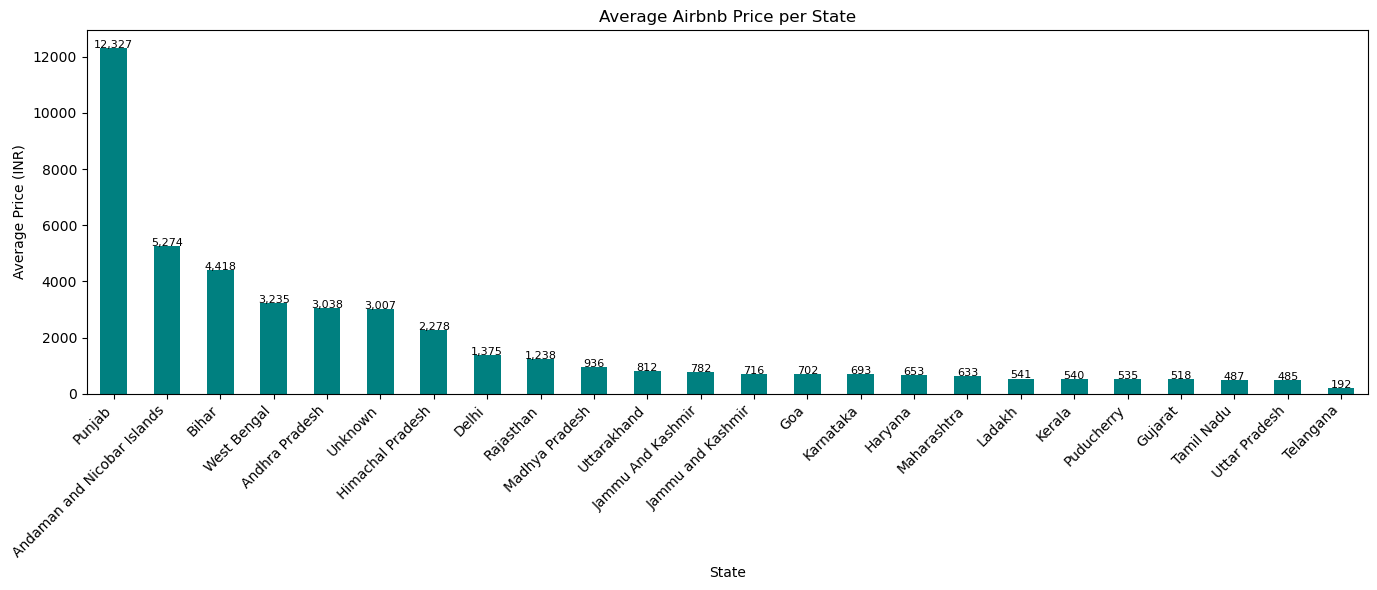

In [423]:
#Number of listings per average price 
state_grouped1=df.groupby('state_cleaned')['pricing/rate/amount'].agg(listing_count='count',
                                      average_price='mean').sort_values(by='average_price', ascending=False)
fig,ax = plt.subplots(figsize=(14,6))
state_grouped1['average_price'].plot(kind='bar', ax=ax, color='teal')
for bar in ax.patches:
    height=bar.get_height()
    ax.text(
        bar.get_x()+bar.get_width()/2,
        height+3,
        f'{height:,.0f}',
        ha='center', fontsize=8
    )
ax.set_title("Average Airbnb Price per State")
ax.set_ylabel("Average Price (INR)")
ax.set_xlabel('State')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [424]:
print(state_grouped1.head(26))

                             listing_count  average_price
state_cleaned                                            
Punjab                                   3   12327.000000
Andaman and Nicobar Islands              1    5274.000000
Bihar                                    1    4418.000000
West Bengal                              2    3235.000000
Andhra Pradesh                           3    3038.333333
Unknown                                  1    3007.000000
Himachal Pradesh                        25    2277.840000
Delhi                                   23    1374.565217
Rajasthan                               39    1238.461538
Madhya Pradesh                           2     936.500000
Uttarakhand                             34     812.235294
Jammu And Kashmir                        1     782.000000
Jammu and Kashmir                        1     716.000000
Goa                                    170     701.700000
Karnataka                               16     693.187500
Haryana       

#### Insight
- Punjab has the highest average price (12,327), but only 3 listings — could be skewed by a few expensive properties
- Andaman and Nicobar Islands (5,274) and Bihar (₹4,418) also have high averages but only 1 listing each, so not reliable for trends.
- Himachal Pradesh (₹2,277) and Delhi (₹1,375) have higher average prices.
- Goa, despite high listings, has a relatively low average price (702) — possibly due to a high supply of budget options
- Maharashtra (632), Karnataka (693), Haryana (₹653) — offer relatively affordable stays with good number of listings.
- Tamil Nadu is also low (487), but verify abbreviation.


In [425]:
df[df['city_raw'] == 'Unknown'].shape


(22, 14)

In [426]:
city_corrections = {
    'Lonavla': 'Lonavala'
}
df['city_cleaned'] = df['city_raw'].replace(city_corrections)


In [427]:
#View Top Cities by Listings
city_grouped = df.groupby('city_cleaned').agg(
    listings_count=('pricing/rate/amount', 'count'),
    average_price=('pricing/rate/amount', 'mean')
).sort_values(by='listings_count', ascending=False)

city_grouped.head(10)

,listings_count,average_price
city_cleaned,,
Lonavala,29,512.103448
Candolim,26,569.153846
New Delhi,22,1349.590909
Unknown,22,1043.136364
Calangute,15,812.533333
Anjuna,15,544.733333
Jaipur,14,1854.142857
Udaipur,11,549.818182
Gurugram,11,731.181818


In [428]:
city_grouped = city_grouped[city_grouped.index != 'Unknown']

In [429]:
city_grouped.head(10)

,listings_count,average_price
city_cleaned,,
Lonavala,29,512.103448
Candolim,26,569.153846
New Delhi,22,1349.590909
Calangute,15,812.533333
Anjuna,15,544.733333
Jaipur,14,1854.142857
Udaipur,11,549.818182
Gurugram,11,731.181818
North Goa,10,667.900000


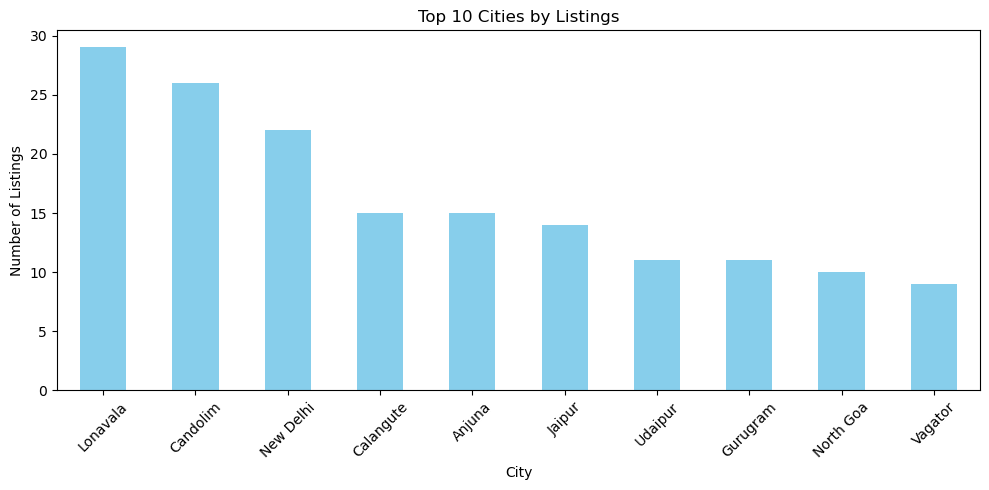

In [430]:
top_cities = city_grouped.head(10)

top_cities['listings_count'].plot(kind='bar', figsize=(10,5), title='Top 10 Cities by Listings', color='skyblue')
plt.ylabel('Number of Listings')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Insight

Lonavla has the highest number of listings (29), followed by Candolim (26) and New Delhi (22).

Popular tourist destinations in Goa (Candolim, Calangute, Anjuna) dominate the top 5 — indicating high Airbnb density in coastal holiday spots.

New Delhi stands out as a major urban market with relatively higher pricing (1349 avg).

In [431]:
city_grouped_sorted_by_price = city_grouped.sort_values(by='average_price', ascending=False)
city_grouped_sorted_by_price.head(10)


,listings_count,average_price
city_cleaned,,
Amritsar Cantt.,1,36079.000000
Kolkata,1,6013.000000
Bhuntar,3,5744.000000
Govind Nagar,1,5274.000000
Kasol,1,4470.000000
Khoohdi,1,4444.000000
Patna,1,4418.000000
Ramgarh,2,4381.000000
Janedghat,1,4351.000000


#### Insight
A few cities have exceptionally high average prices, like Amritsar Cantt. (36,079) — but this is based on only 1 listing, so not statistically reliable.

Bhuntar, Govind Nagar, and Kasol show premium pricing, likely due to niche or luxury properties in remote/hill locations.

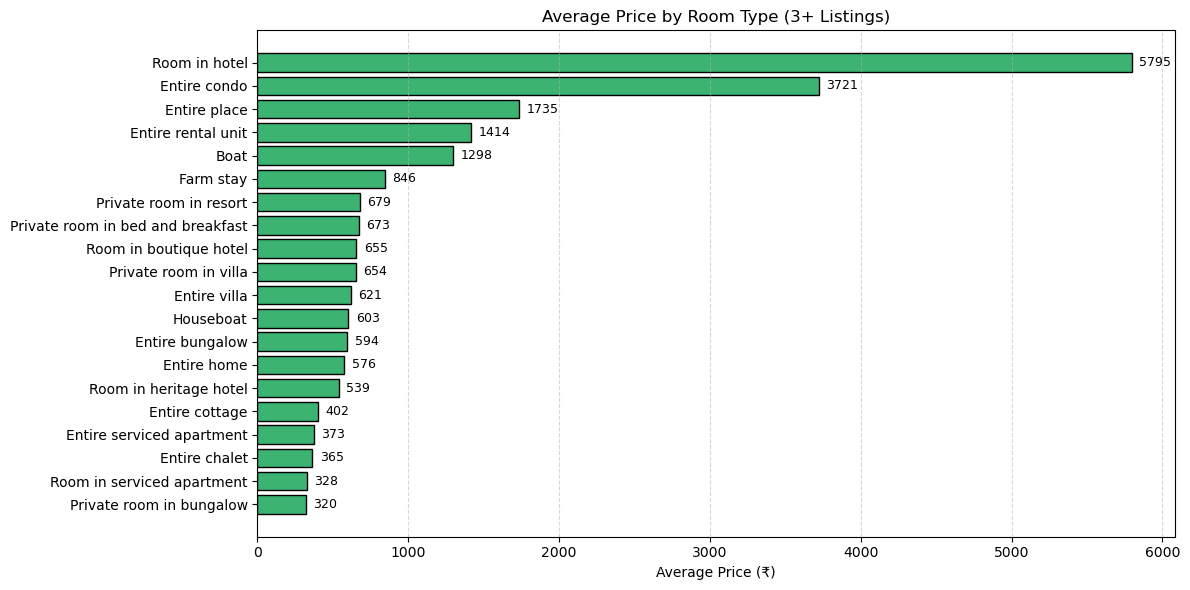

In [ ]:
#Analyze Price by roomType
roomtype_grouped = df.groupby('roomType').agg(
    listings_count=('pricing/rate/amount', 'count'),
    average_price=('pricing/rate/amount', 'mean')
).reset_index()

# Filtering roomTypes with very few listings
roomtype_filtered = roomtype_grouped[roomtype_grouped['listings_count'] > 2]

# Sorting by average_price descending
roomtype_sorted = roomtype_filtered.sort_values(by='average_price', ascending=False)

fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.barh(roomtype_sorted['roomType'], roomtype_sorted['average_price'], color='mediumseagreen', edgecolor='black')

for patch in ax.patches:
    width = patch.get_width() 
    ax.text(width + 50, patch.get_y() + patch.get_height() / 2,
            f"{int(width)}", 
            va='center', fontsize=9)

ax.set_xlabel("Average Price (₹)")
ax.set_title("Average Price by Room Type (3+ Listings)")
ax.invert_yaxis()  # Optional: Highest bar on top
ax.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



In [447]:
print(roomtype_sorted.sort_values(by='average_price', ascending=False))

                             roomType  listings_count  average_price
33                      Room in hotel              19    5795.315789
7                        Entire condo               8    3721.625000
11                       Entire place               3    1735.666667
12                 Entire rental unit               7    1414.857143
0                                Boat               3    1298.333333
16                          Farm stay              58     846.568966
29             Private room in resort              13     679.000000
19  Private room in bed and breakfast               9     673.888889
31             Room in boutique hotel              12     655.916667
30              Private room in villa              11     654.090909
15                       Entire villa             220     621.295455
17                          Houseboat               6     603.333333
4                     Entire bungalow              29     594.206897
9                         Entire h

#### Insight 
Most Expensive Room Types (by average price):
Room in hotel (5795) — Despite only 19 listings, it commands the highest average price. Likely luxury or high-end stays.

Entire condo (3721) — High price possibly due to amenities and location; only 8 listings.

Entire place (1735) and Entire rental unit (1414) — Modestly priced but may indicate better privacy and convenience.

Room in serviced apartment (328)

Private room in bungalow (320)

Entire chalet (365)

These options are budget-friendly and likely aimed at solo travelers or minimalists.

Entire villa → 220 listings (621 avg): Most common offering; moderately priced. May be a sweet spot between space and cost.

Farm stay → 58 listings (846 avg): Suggests rising demand for nature-based experiences.

Entire home → 49 listings (576 avg): Popular among families or groups.

####	Correlation between price and number of guests


In [449]:
df_corr = df[['pricing/rate/amount', 'numberOfGuests']].dropna()


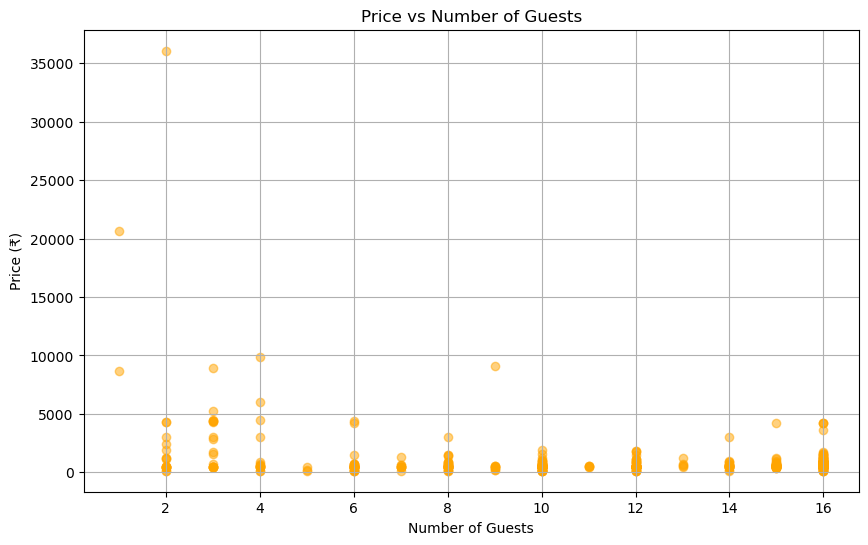

In [450]:

plt.figure(figsize=(10, 6))
plt.scatter(df_corr['numberOfGuests'], df_corr['pricing/rate/amount'], alpha=0.5, color='orange')
plt.xlabel('Number of Guests')
plt.ylabel('Price (₹)')
plt.title('Price vs Number of Guests')
plt.grid(True)
plt.show()


In [452]:
correlation = df_corr['pricing/rate/amount'].corr(df_corr['numberOfGuests'])
print(f"Correlation: {correlation:.2f}")


Correlation: -0.24


#### Insight
A negative correlation means that as the number of guests increases, the price tends to decrease slightly.

However, the strength is weak (close to 0), so it's not a strong or reliable relationship.

This could indicate that some listings meant for just 1–2 people are luxury stays, while those for larger groups are often budget accommodations like hostels, cottages, farm stays, etc.

numberOfGuests
1     14687.000000
2      2991.100000
3      2581.894737
4      1754.176471
5       234.000000
6       720.516129
7       525.300000
8       669.406250
9      1272.700000
10      545.966102
11      495.800000
12      609.410714
13      698.400000
14      661.782609
15      703.111111
16      730.674419
Name: pricing/rate/amount, dtype: float64


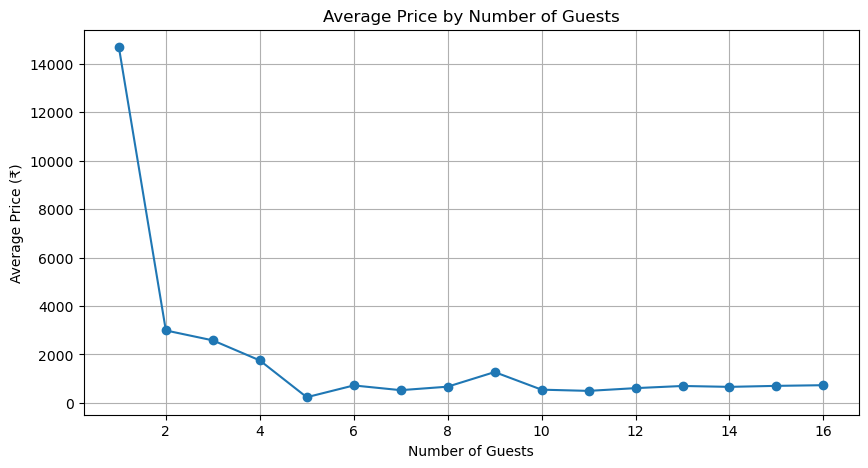

In [ ]:
#Grouped average price by guest count
grouped = df_corr.groupby('numberOfGuests')['pricing/rate/amount'].mean()
print(grouped)
grouped.plot(kind='line', marker='o', figsize=(10,5), title='Average Price by Number of Guests')
plt.ylabel('Average Price (₹)')
plt.xlabel('Number of Guests')
plt.grid(True)
plt.show()


#### Insight
1-guest listings are the most expensive on average, suggesting high-end single-occupancy properties (like villas or boutique hotel rooms).

From 2 to 4 guests, the average price drops sharply — possibly shared or small family accommodations.

Guest counts from 6–16 show a fairly stable price range (500–700), indicating economical group stays.

Guest count 5 has very low price (234) — this may be a data entry issue or an outlier 

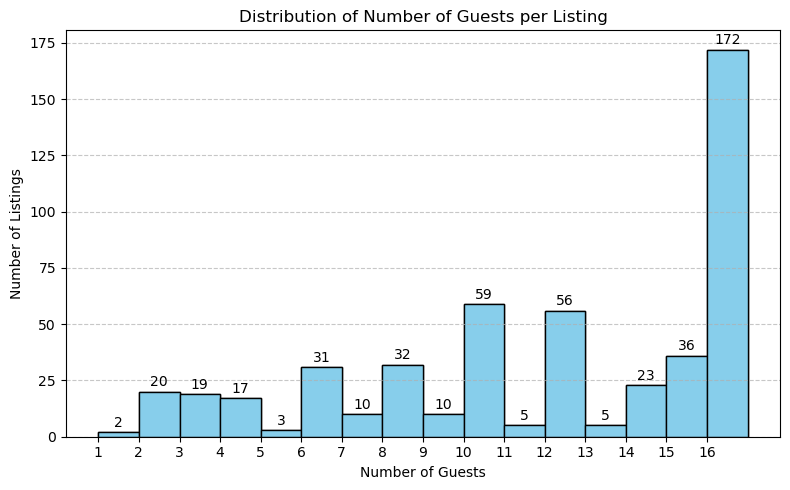

numberOfGuests
1       2
2      20
3      19
4      17
5       3
6      31
7      10
8      32
9      10
10     59
11      5
12     56
13      5
14     23
15     36
16    172
Name: count, dtype: int64


In [457]:
#Distribution of Number of Guests
plt.figure(figsize=(8, 5))
plt.hist(df['numberOfGuests'], bins=range(1, df['numberOfGuests'].max() + 2), edgecolor='black', color='skyblue')
counts, bins, patches = plt.hist(df['numberOfGuests'], bins=range(1, df['numberOfGuests'].max() + 2), edgecolor='black', color='skyblue')
for count, patch in zip(counts, patches):
    plt.text(patch.get_x() + patch.get_width() / 2, count + 1, int(count), ha='center', va='bottom')

plt.title('Distribution of Number of Guests per Listing')
plt.xlabel('Number of Guests')
plt.ylabel('Number of Listings')
plt.xticks(range(1, df['numberOfGuests'].max() + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
guest_counts = df['numberOfGuests'].value_counts().sort_index()
print(guest_counts)


#### Insight
- Most listings accommodate 16 guests (172 listings), which likely includes large properties or group stays.
- Medium-capacity listings for 10–12 guests are also quite common (e.g., 59 listings for 10 guests, 56 for 12).
- Very small capacity listings (1–2 guests) are quite rare – only 2 listings allow 1 guest, and 20 for 2 guests.
- Moderate guest capacities like 4–8 guests have a balanced distribution, with 17–32 listings each.


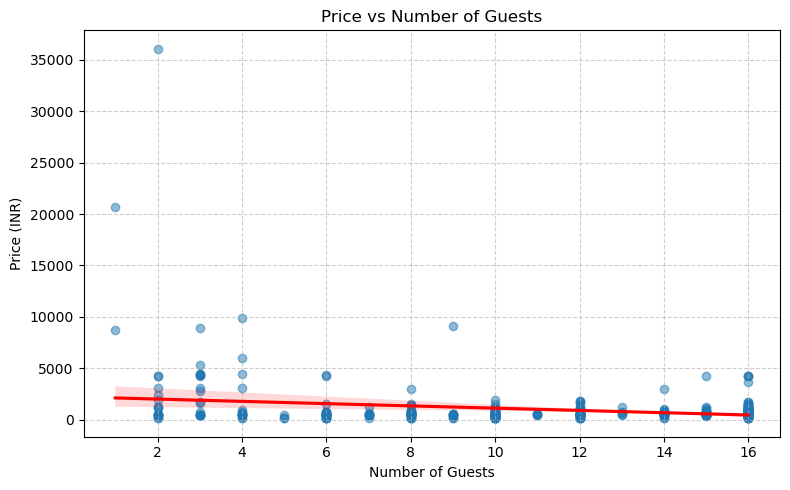

numberOfGuests
1     14687.000000
2      2991.100000
3      2581.894737
4      1754.176471
5       234.000000
6       720.516129
7       525.300000
8       669.406250
9      1272.700000
10      545.966102
11      495.800000
12      609.410714
13      698.400000
14      661.782609
15      703.111111
16      730.674419
Name: pricing/rate/amount, dtype: float64


In [ ]:
#Average Price by Number of Guests
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='numberOfGuests', y='pricing/rate/amount', scatter_kws={'alpha':0.5}, line_kws={'color': 'red'})
plt.title('Price vs Number of Guests')
plt.xlabel('Number of Guests')
plt.ylabel('Price (INR)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
guest_price_avg = df.groupby('numberOfGuests')['pricing/rate/amount'].mean()
print(guest_price_avg)


#### Insight 
- The average price **drops drastically** after the 1-guest mark: listings for just 1 guest are extremely expensive (₹14,687), likely due to outliers or luxury listings.
- After that, price decreases and then stabilizes between ₹500–₹730 for guest capacities from 6 to 16 guests.
- 2–4 guest listings are relatively more expensive, averaging ₹1,750–₹3,000, possibly due to being designed for couples or short stays.
- Larger group accommodations (10–16 guests) tend to offer **more affordable per-listing pricing**, possibly due to economies of scale.


There’s a moderate negative correlation between number of guests and price (as earlier, correlation ≈ -0.24), meaning:
As guest capacity increases, the average price per listing tends to decrease slightly.

This could indicate that luxury listings target individuals or couples, while group stays aim for affordability.